In [25]:
import pandas as pd
import numpy as np
df = pd.read_csv('diamonds.csv')

Jag börjar med att tvätta datasetet för att analysen ska bli så bra som möjligt

In [26]:

zero_mask = (df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0)
zero_diamonds = df[zero_mask].copy()


print(f"Hittade {len(zero_diamonds)} diamanter med 0-dimensioner av totalt {len(df)} diamanter")

zero_diamonds

Hittade 20 diamanter med 0-dimensioner av totalt 53940 diamanter


,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [27]:
df.drop(df[zero_mask].index, inplace=True)

# Återställ index efter borttagning
df.reset_index(drop=True, inplace=True)

print(f"Datasetet har nu {len(df)} rader")

Datasetet har nu 53920 rader


In [55]:
null_mask = df.isnull().any(axis=1)
null_objects = df[null_mask]

print(f"Antal objekt med null-värden: {len(null_objects)}")
print(f"Totalt antal objekt: {len(df)}")

if len(null_objects) > 0:
    print("\nObjekt med null-värden:")
    null_objects
else:
    print("\nInga null-värden hittades i datasetet")


Antal objekt med null-värden: 0
Totalt antal objekt: 53918

Inga null-värden hittades i datasetet


kollar så det inte finns några felaktiga värden de icke numeriska värdena

In [57]:
print("Unika värden för Cut:")
print(df['cut'].unique())

print("\nUnika värden för Color:")
print(df['color'].unique())

print("\nUnika värden för Clarity:")
print(df['clarity'].unique())


Unika värden för Cut:
['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']

Unika värden för Color:
['E' 'I' 'J' 'H' 'F' 'G' 'D']

Unika värden för Clarity:
['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


kollar på diamanterna med ett maxvärde för att avgöra om det är logiska dimensioner

In [28]:
max_y_diamond = df[df['y'] == df['y'].max()]
print(f"Diamant med max y-värde ({df['y'].max()}):")
max_y_diamond

Diamant med max y-värde (58.9):


,carat,cut,color,clarity,depth,table,price,x,y,z
24058,2.0,Premium,H,SI2,58.9,57.0,12210,8.09,58.9,8.06


Tar bort pga ingen logik i dimensionerna

In [29]:

df.drop(max_y_diamond.index, inplace=True)

# Återställ index
df.reset_index(drop=True, inplace=True)

print(f"Datasetet har nu {len(df)} rader")
print(f"Nytt max y-värde: {df['y'].max()}")


Datasetet har nu 53919 rader
Nytt max y-värde: 31.8


In [30]:

max_x_diamond = df[df['x'] == df['x'].max()]
print(f"Diamant med max x-värde ({df['x'].max()}):")
max_x_diamond


Diamant med max x-värde (10.74):


,carat,cut,color,clarity,depth,table,price,x,y,z
27400,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98


In [31]:

max_z_diamond = df[df['z'] == df['z'].max()]
print(f"Diamant med max z-värde ({df['z'].max()}):")
max_z_diamond


Diamant med max z-värde (31.8):


,carat,cut,color,clarity,depth,table,price,x,y,z
48392,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.8


In [32]:
df.drop(max_z_diamond.index, inplace=True)

# Återställ index
df.reset_index(drop=True, inplace=True)

print(f"Datasetet har nu {len(df)} rader")
print(f"Nytt max z-värde: {df['z'].max()}")

Datasetet har nu 53918 rader
Nytt max z-värde: 6.98


In [33]:
most_expensive_diamond = df[df['price'] == df['price'].max()]
print(f"Dyraste diamanten kostar ${df['price'].max()}:")
most_expensive_diamond


Dyraste diamanten kostar $18823:


,carat,cut,color,clarity,depth,table,price,x,y,z
27731,2.29,Premium,I,VS2,60.8,60.0,18823,8.5,8.47,5.16


In [34]:
max_depth_diamond = df[df['depth'] == df['depth'].max()]
print(f"Diamant med max depth-värde ({df['depth'].max()}):")
max_depth_diamond


Diamant med max depth-värde (79.0):


,carat,cut,color,clarity,depth,table,price,x,y,z
52838,0.5,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09
52839,0.5,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


In [35]:
max_table_diamond = df[df['table'] == df['table'].max()]
print(f"Diamant med max table-värde ({df['table'].max()}):")
max_table_diamond


Diamant med max table-värde (95.0):


,carat,cut,color,clarity,depth,table,price,x,y,z
24920,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87


In [49]:
max_carat_diamond = df[df['carat'] == df['carat'].max()]
print(f"diamant med max carat ({df['carat'].max()})")
max_carat_diamond

diamant med max carat (5.01)


,carat,cut,color,clarity,depth,table,price,x,y,z
27400,5.01,Fair,J,I1,65.5,59.0,18018,10.74,10.54,6.98


Nu kollar jag korrelation mellan variablerna till priset

In [40]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Samband mellan Carat och Pris'}, xlabel='Carat', ylabel='Pris ($)'>

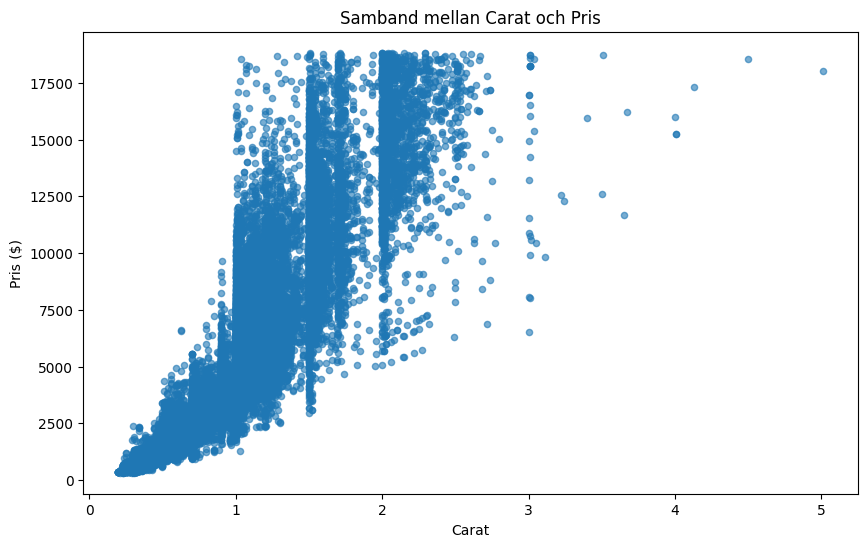

In [41]:
df.plot(kind='scatter', x='carat', y='price', alpha=0.6, 
        title='Samband mellan Carat och Pris', 
        xlabel='Carat', ylabel='Pris ($)', 
        figsize=(10, 6))


eftersom scatterplots är bra för att se samband mellan två variabler så konverterar jag cut till numeriskt värde för att lättare kunna se sambandet mellan cut och pris.

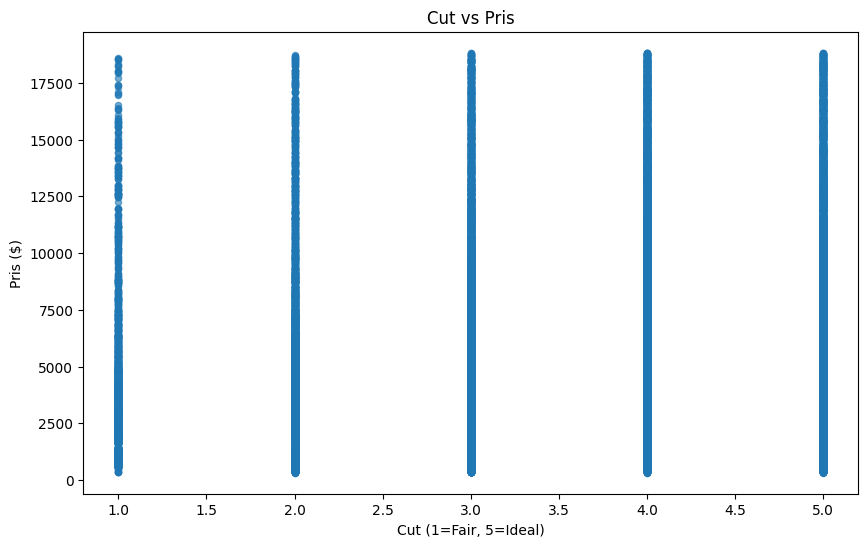

In [42]:
cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
df_temp = df.copy()
df_temp['cut_numeric'] = df_temp['cut'].map(cut_mapping)

df_temp.plot(kind='scatter', x='cut_numeric', y='price', alpha=0.6,
             title='Cut vs Pris', xlabel='Cut (1=Fair, 5=Ideal)', ylabel='Pris ($)',
             figsize=(10, 6))
plt.show()


här ser vi tydligt att det finns diamanter i alla prisklasser, i alla olika cuts. Det är helt enkelt inte den ända faktorn som påverkar priset.

Gör histogram för att förstå vilka priser som är vanligast.

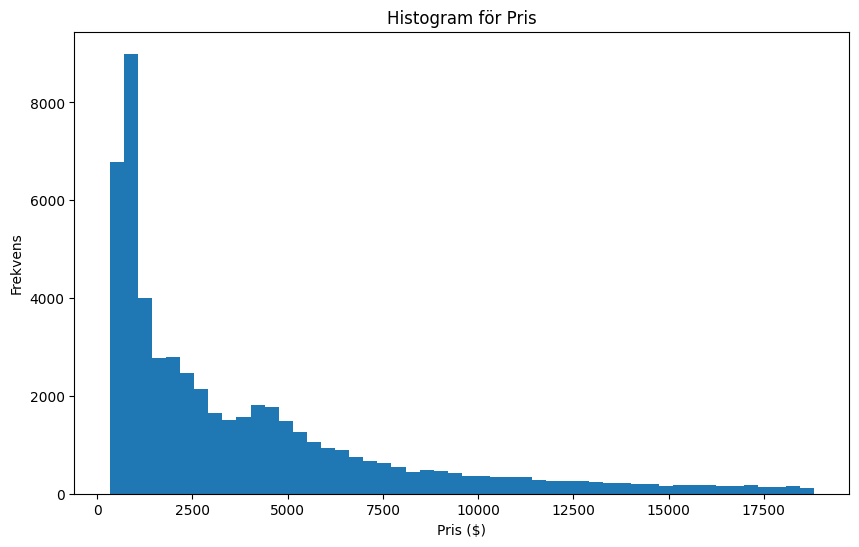

In [44]:
df['price'].plot(kind='hist', bins=50, figsize=(10, 6), 
                 title='Histogram för Pris', 
                 xlabel='Pris ($)', 
                 ylabel='Frekvens')
plt.show()

likaså med carat, depth och table för se eventuella likheter

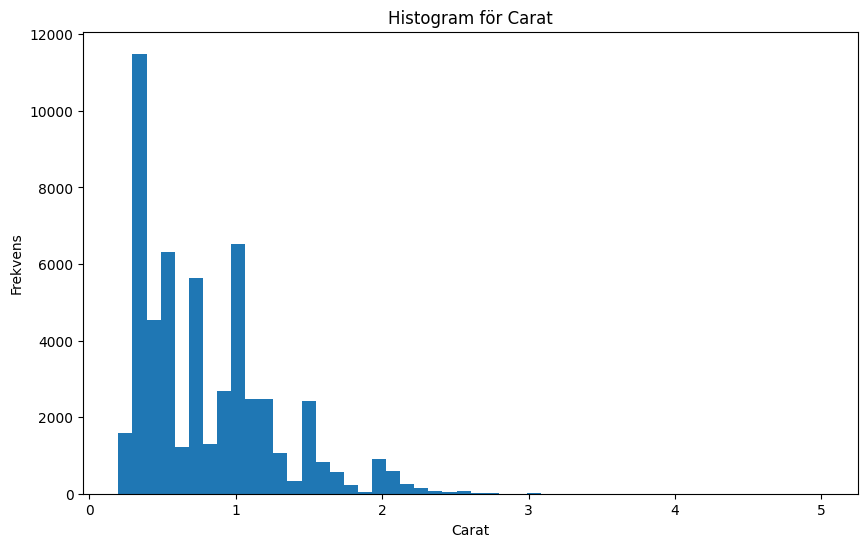

In [48]:
df['carat'].plot(kind='hist', bins=50, figsize=(10, 6), 
                 title='Histogram för Carat', 
                 xlabel='Carat', 
                 ylabel='Frekvens')
plt.show()


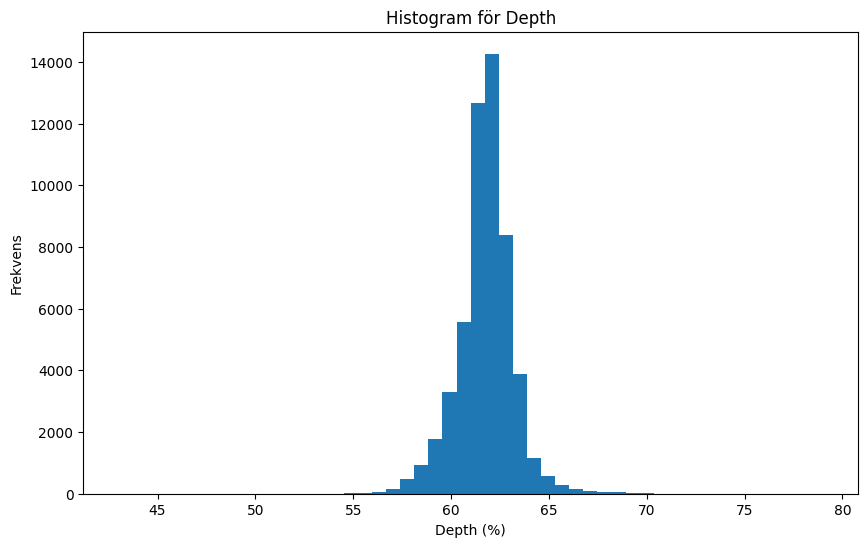

In [50]:
df['depth'].plot(kind='hist', bins=50, figsize=(10, 6), 
                 title='Histogram för Depth', 
                 xlabel='Depth (%)', 
                 ylabel='Frekvens')
plt.show()


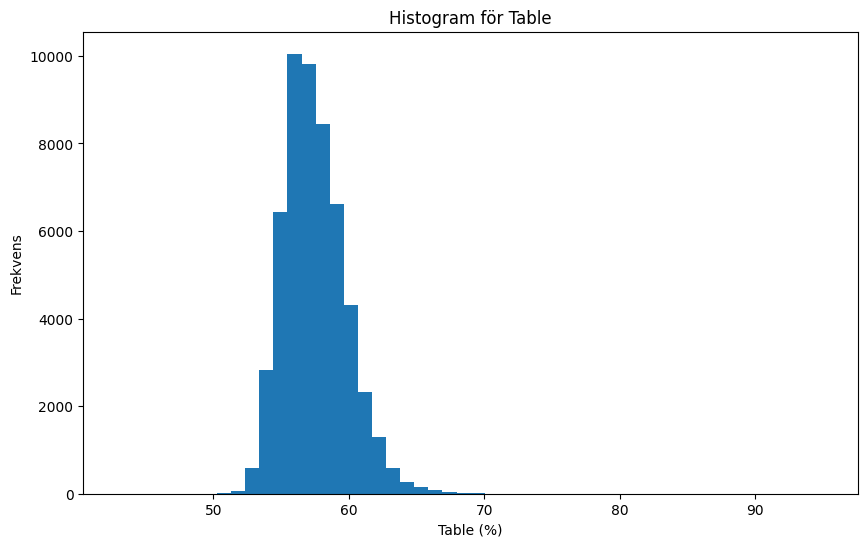

In [51]:
df['table'].plot(kind='hist', bins=50, figsize=(10, 6), 
                 title='Histogram för Table', 
                 xlabel='Table (%)', 
                 ylabel='Frekvens')
plt.show()


Nu gör jag boxplots för att vilka kategorier som tenderar att ha högre och lägre priser. och även identiifiera om det finns några outliers.

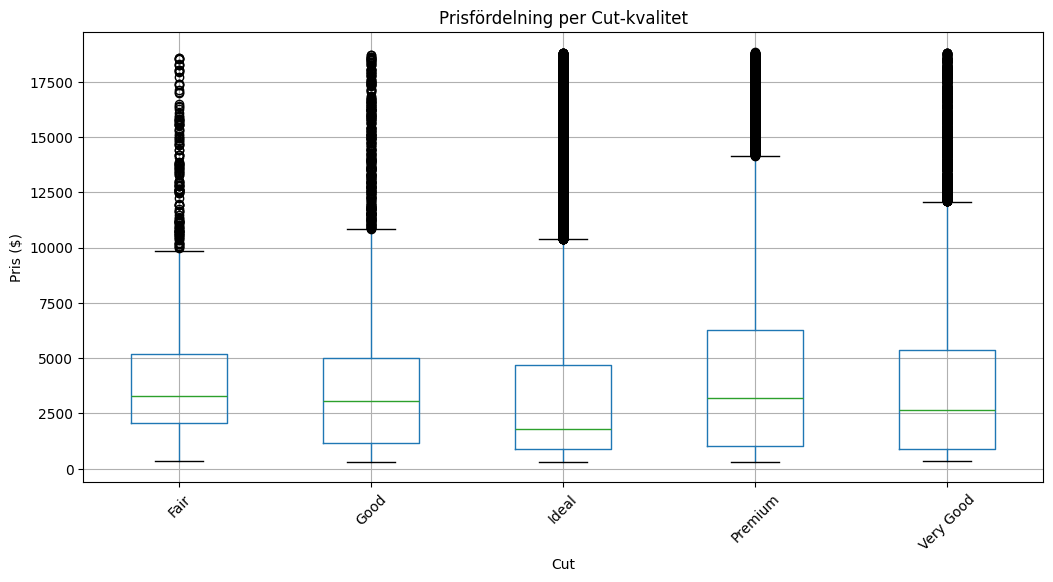

In [52]:

df.boxplot(column='price', by='cut', figsize=(12, 6))
plt.title('Prisfördelning per Cut-kvalitet')
plt.suptitle('')  
plt.xlabel('Cut')
plt.ylabel('Pris ($)')
plt.xticks(rotation=45)
plt.show()


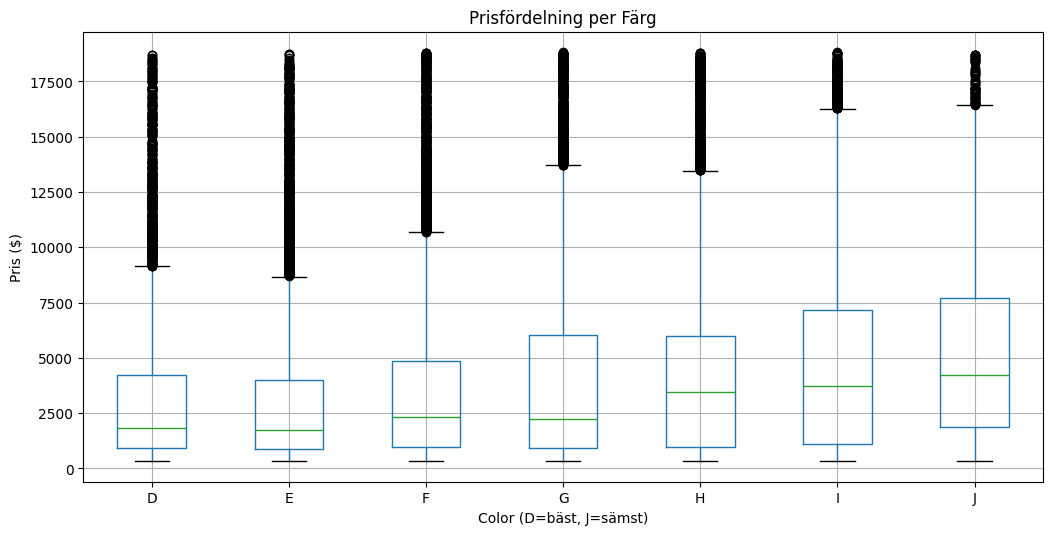

In [53]:
df.boxplot(column='price', by='color', figsize=(12, 6))
plt.title('Prisfördelning per Färg')
plt.suptitle('')
plt.xlabel('Color (D=bäst, J=sämst)')
plt.ylabel('Pris ($)')
plt.show()


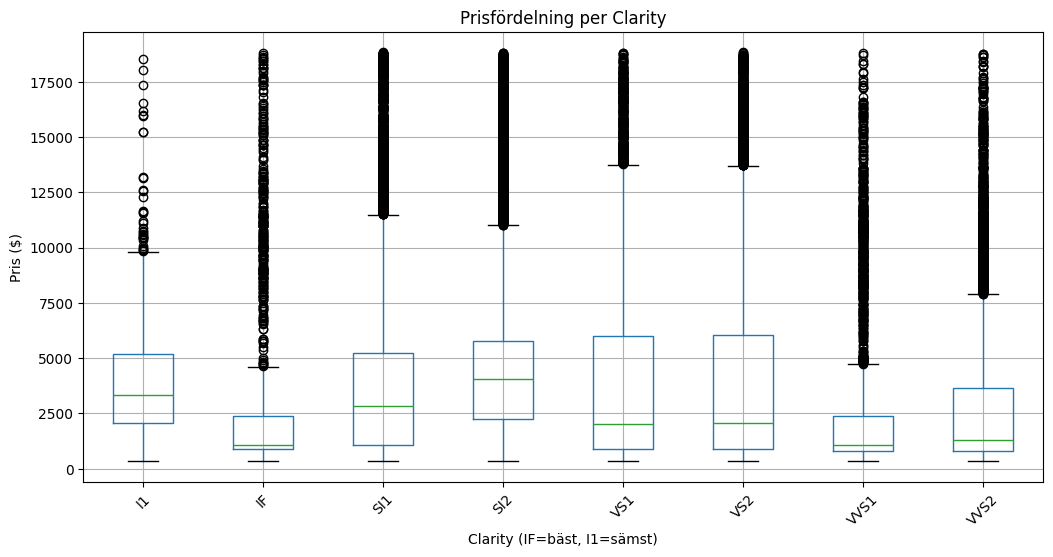

In [54]:
df.boxplot(column='price', by='clarity', figsize=(12, 6))
plt.title('Prisfördelning per Clarity')
plt.suptitle('')  # Ta bort automatisk titel
plt.xlabel('Clarity (IF=bäst, I1=sämst)')
plt.ylabel('Pris ($)')
plt.xticks(rotation=45)
plt.show()


Nu gör jag en Linjär Regressionsanalys
en modell som ska förutsäga diamantpriser baserat på carat, cut, color och clarity.

Istället för att bara säga "större diamanter kostar mer" kan jag exakt säga "varje extra carat ökar priset med X, allt annat lika". jag får helt enkelt siffror på hur mycket varje egenskap påverkar priset.

I verkligheten är diamantens genskaper sammankopplade. Stora diamanter har ofta sämre klarhet. Regressionen rensar bort dessa samband och visar den effekten av varje egenskap separat.


R-squared värdet (0-1) berättar hur bra modellen är. 0.90 betyder att 90% av prisvariationen kan förklara

Residualanalysen visar diamanter som är ovanligt dyra eller billiga jämfört med vad modellen förväntar sig. Detta kan avslöja dolda kvalitetsfaktorer eller dålig/felaktig prissättning.

Numeriska värden för cut: [5 4 2 3 1]
Numeriska värden för color: [6 2 1 3 5 4 7]
Numeriska värden för clarity: [2 3 5 4 6 7 1 8]
Regressionskoefficienter:
Intercept (konstant): -7214.91
Carat: 8782.68
Cut: 155.61
Color: 319.51
Clarity: 524.43
R-squared: 0.9041

Medelabsolutfel: $854.72


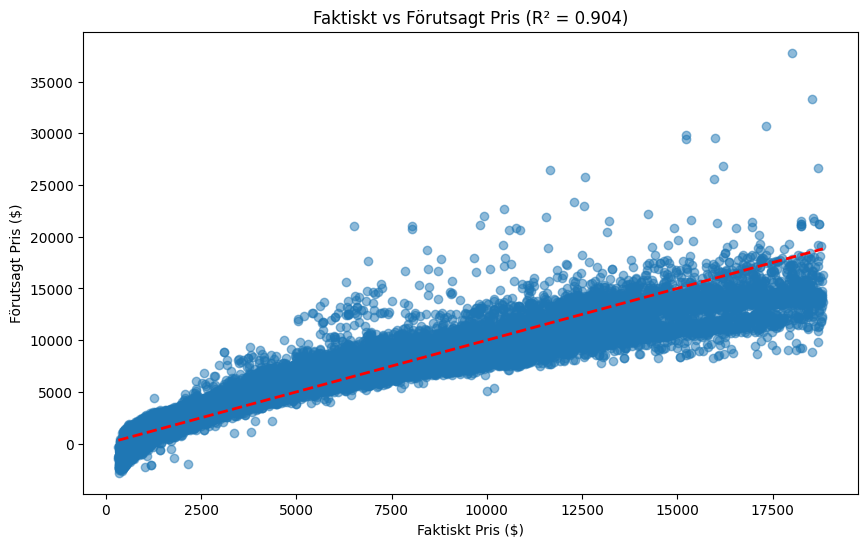

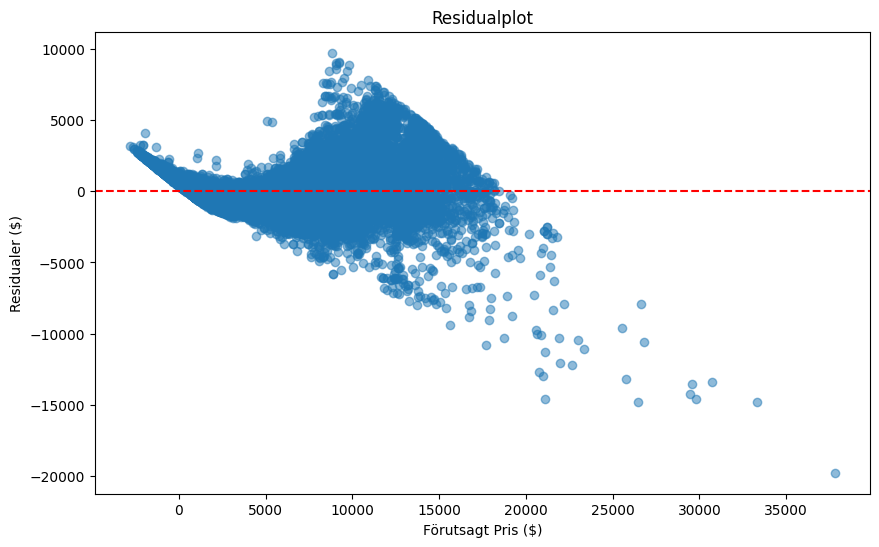

In [61]:
df_regression = df.copy()

cut_mapping = {'Fair': 1, 'Good': 2, 'Very Good': 3, 'Premium': 4, 'Ideal': 5}
color_mapping = {'J': 1, 'I': 2, 'H': 3, 'G': 4, 'F': 5, 'E': 6, 'D': 7} 
clarity_mapping = {'I1': 1, 'SI2': 2, 'SI1': 3, 'VS2': 4, 'VS1': 5, 'VVS2': 6, 'VVS1': 7, 'IF': 8}

df_regression['cut_num'] = df_regression['cut'].map(cut_mapping)
df_regression['color_num'] = df_regression['color'].map(color_mapping)
df_regression['clarity_num'] = df_regression['clarity'].map(clarity_mapping)

print("Numeriska värden för cut:", df_regression['cut_num'].unique())
print("Numeriska värden för color:", df_regression['color_num'].unique())
print("Numeriska värden för clarity:", df_regression['clarity_num'].unique())


X = df_regression[['carat', 'cut_num', 'color_num', 'clarity_num']].values
y = df_regression['price'].values

X_with_intercept = np.column_stack([np.ones(len(X)), X])

coefficients = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y

print("Regressionskoefficienter:")
print(f"Intercept (konstant): {coefficients[0]:.2f}")
print(f"Carat: {coefficients[1]:.2f}")
print(f"Cut: {coefficients[2]:.2f}")
print(f"Color: {coefficients[3]:.2f}")
print(f"Clarity: {coefficients[4]:.2f}")

y_pred = X_with_intercept @ coefficients

ss_res = np.sum((y - y_pred) ** 2)
ss_tot = np.sum((y - np.mean(y)) ** 2)
r_squared = 1 - (ss_res / ss_tot)

print(f"R-squared: {r_squared:.4f}")

df_regression['predicted_price'] = y_pred
df_regression['residuals'] = y - y_pred

print(f"\nMedelabsolutfel: ${np.mean(np.abs(df_regression['residuals'])):.2f}")



plt.figure(figsize=(10, 6))
plt.scatter(df_regression['price'], df_regression['predicted_price'], alpha=0.5)
plt.plot([df_regression['price'].min(), df_regression['price'].max()], 
         [df_regression['price'].min(), df_regression['price'].max()], 'r--', lw=2)
plt.xlabel('Faktiskt Pris ($)')
plt.ylabel('Förutsagt Pris ($)')
plt.title(f'Faktiskt vs Förutsagt Pris (R² = {r_squared:.3f})')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(df_regression['predicted_price'], df_regression['residuals'], alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Förutsagt Pris ($)')
plt.ylabel('Residualer ($)')
plt.title('Residualplot')
plt.show()
